# Estimación poblacional en México 1940-2020

Consulta la página del INEGI para obtener los datos de la población total de México en los años de 1950 a 2010 (cada 10 años) y ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos. Realiza una gráfica que involucre los datos y las curvas de cada modelo. Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2015.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from scipy.interpolate import interp1d

In [2]:
datos = np.loadtxt('poblacion_inegi.txt', skiprows=2)

In [3]:
x = datos[:,0]
y = datos[:,1]
y_40=19653552
y_95=91158290
y_15=119938473 #según la Encuesta Intercensal 2015, la poblacíón mexicana ascendía a 119,938,473


In [4]:
print (x)

[1950. 1960. 1970. 1980. 1990. 2000. 2010.]


In [5]:
print (y)

[2.57910170e+07 3.49231290e+07 4.82252380e+07 6.68468330e+07
 8.12496450e+07 9.74834120e+07 1.12336538e+08]


Text(0.5, 1.0, 'Censos Poblaciones 1940-2010')

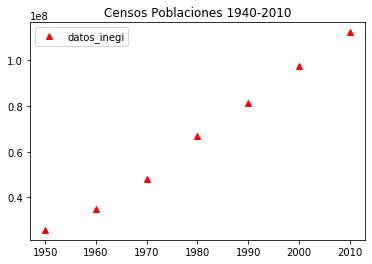

In [6]:
plt.plot(x, y, 'r^')
plt.legend(['datos_inegi'], loc='best')
plt.title('Censos Poblaciones 1940-2010')

#### Modelo 1: Ajuste Polinomial de Grado 1

In [7]:
npoints=2

In [8]:
ngrado = npoints -1
coeficientes = np.polyfit(x,y,ngrado)


In [9]:
print (coeficientes)

[ 1.49207691e+06 -2.88761860e+09]


*Polinomio de grado 1*

$$p_{2 points}(x) = 1.49207691e^{6}x -2.88761860e^{9}$$

In [10]:
neval = 10000
xeval= np.linspace(min(x),max(x), neval)
yeval= np.polyval(coeficientes,xeval)
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 10000
yeval.shape: 10000


Text(0.5, 1.0, 'Gráfica del polinomio interpolador de grado 1')

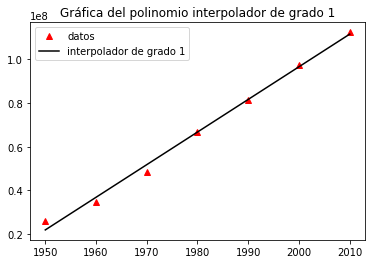

In [11]:
plt.plot(x, y, 'r^', xeval, yeval, 'k-')
plt.legend(['datos','interpolador de grado 1'], loc='best')
plt.title('Gráfica del polinomio interpolador de grado 1')

#### Modelo 2: Ajuste Polinomial de Grado 3

*Con los coeficientes encontrados, tenemos el siguiente polinomio de grado 7:*

In [12]:
npoints_p2=4

In [13]:
ngrado_p2 = npoints_p2 -1
coeficientes_p2 = np.polyfit(x,y,ngrado_p2)
print (coeficientes_p2)

[-2.51088028e+02  1.49560881e+06 -2.96784655e+09  1.96206011e+12]


*Polinomio de grado 3:*

$$p_{4 points}(x) = -2.51088028e^{2}x^3 + 1.49560881e^{6}x^2 -2.96784655e^{9}x + 1.96206011e^{12}$$

In [14]:
neval_p2 = 10000
xeval_p2 = np.linspace(min(x),max(x), neval_p2)
yeval_p2 = np.polyval(coeficientes_p2,xeval_p2)
print('xeval.shape:', xeval_p2.shape[0])
print('yeval.shape:', yeval_p2.shape[0])

xeval.shape: 10000
yeval.shape: 10000


Text(0.5, 1.0, 'Gráfica del polinomio interpolador de grado 3')

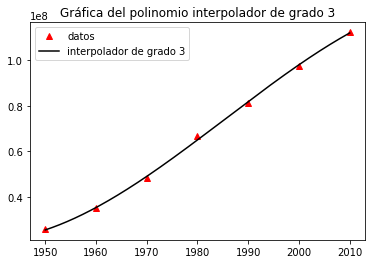

In [15]:
plt.plot(x, y, 'r^', xeval_p2, yeval_p2, 'k-')
plt.legend(['datos','interpolador de grado 3'], loc='best')
plt.title('Gráfica del polinomio interpolador de grado 3')

#### Modelo 3: Ajuste Polinomial de Grado 6

In [16]:
npoints_p3 = 7
ngrado_p3 = npoints_p3-1
coeficientes_p3=np.polyfit(x,y,ngrado_p3)
print(coeficientes_p3)

[-7.07161721e-02  8.40168145e+02 -4.15902945e+06  1.09800940e+10
 -1.63054272e+13  1.29135771e+16 -4.26127155e+18]


*Polinomio de grado 6:*

$$p_{7 points}(x) = -7.07161721e^{-2}x^6 + 8.40168145e^{2}x^5 -4.15902945e^{6}x^4 + 1.09800940e^{10}x^3 -1.63054272e^{13}x^2 + 1.29135771e^{16}x -4.26127155e^{18}$$



In [17]:
neval_p3 = 10000
xeval_p3 = np.linspace(min(x),max(x), neval_p3)
yeval_p3 = np.polyval(coeficientes_p3,xeval_p3)
print('xeval.shape:', xeval_p3.shape[0])
print('yeval.shape:', yeval_p3.shape[0])

xeval.shape: 10000
yeval.shape: 10000


Text(0.5, 1.0, 'Gráfica del polinomio interpolador de grado 6')

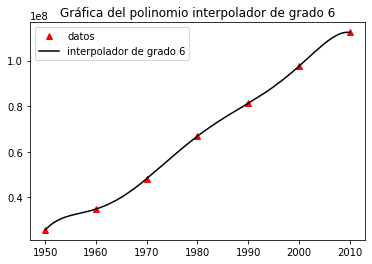

In [18]:
plt.plot(x, y, 'r^', xeval_p3, yeval_p3, 'k-')
plt.legend(['datos','interpolador de grado 6'], loc='best')
plt.title('Gráfica del polinomio interpolador de grado 6')

In [19]:
max(yeval)

111455994.85714388

#### Modelo 4: Splines Cúbicos

In [20]:
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval_sp = 10000
xeval_sp = np.linspace(min(x),max(x), neval_sp)
yeval_sp = pw_spline(xeval_sp)
print('xeval.shape:', xeval_sp.shape[0])
print('yeval.shape:', yeval_sp.shape[0])

xeval.shape: 10000
yeval.shape: 10000


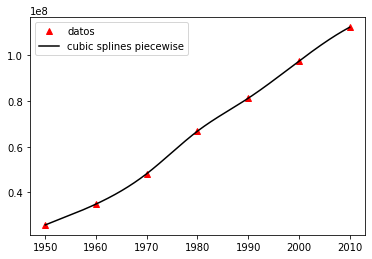

In [21]:
plt.plot(x, y, 'r^',xeval_sp, yeval_sp, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')

## Modelación de todos los modelos juntos

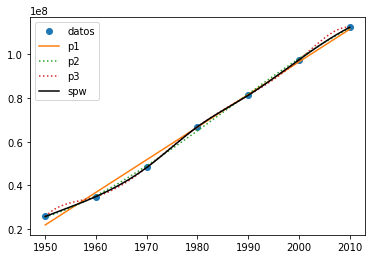

In [22]:
plt.plot(x, y, 'o', xeval, yeval,'-', xeval_p2, yeval_p2,':', xeval_p3, yeval_p3,':', xeval_sp, yeval_sp, 'k-')
plt.legend(['datos','p1','p2','p3','spw'], loc='best')

## Estimaciones para 1940, 1995, 2020

#### Estimaciones empleando el M1: Polinomio de Grado 1

In [25]:
print ('Estimación M1 para el año 1940:',np.polyval(coeficientes,1940))
print ('Estimación M1 para el año 1995:',np.polyval(coeficientes,1995))
print ('Estimación M1 para el año 2020:',np.polyval(coeficientes,2020))

Estimación M1 para el año 1940: 7010610.857142925
Estimación M1 para el año 1995: 89074841.14285755
Estimación M1 para el año 2020: 126376764.00000095


#### Estimaciones empleando el M2: Polinomio de Grado 3

In [26]:
print ('Estimación M2 para el año 1940:',np.polyval(coeficientes_p2,1940))
print ('Estimación M2 para el año 1995:',np.polyval(coeficientes_p2,1995))
print ('Estimación M2 para el año 2020:',np.polyval(coeficientes_p2,2020))

Estimación M2 para el año 1940: 21024893.29321289
Estimación M2 para el año 1995: 90138305.9663086
Estimación M2 para el año 2020: 122312708.42700195


#### Estimaciones empleando el M3: Polinomio de Grado 6

In [27]:
print ('Estimación M3 para el año 1940:',np.polyval(coeficientes_p3,1940))
print ('Estimación M3 para el año 1995:',np.polyval(coeficientes_p3,1995))
print ('Estimación M3 para el año 2020:',np.polyval(coeficientes_p3,2020))

Estimación M3 para el año 1940: -68244480.0
Estimación M3 para el año 1995: 88493568.0
Estimación M3 para el año 2020: 37668352.0


#### Estimaciones empleando el M4: Splines Cúbicos

*En el caso del modelo Spline Piecewise, solo se puede interpolar, no extrapolar.*

In [28]:
pw_spline(1995)

array(89101821.60267858)

## Cálculo de Errores

#### Errores M1: Polinomio de Grado 1

In [29]:
y_m1_40= np.polyval(coeficientes,1940)
y_m1_95= np.polyval(coeficientes,1995)
y_m1_20=np.polyval(coeficientes,2020)

In [30]:
#Calculando el error en porcentaje (redondeado)

print ('El error de la estimación del modelo 1 para el año 1940:', round((abs(y_m1_40-y_40)/y_40)*100))
print ('El error de la estimación del modelo 1 para el año 1995:', round((abs(y_m1_95-y_95)/y_95)*100))
print ('El error de la estimación del modelo 1 para el año 2020:', round((abs(y_m1_20-y_15)/y_15)*100))

El error de la estimación del modelo 1 para el año 1940: 64.0
El error de la estimación del modelo 1 para el año 1995: 2.0
El error de la estimación del modelo 1 para el año 2020: 5.0


*Como podemos observar, los errores, sobretodo para el año 1940, son muy altos; procedemos a calcular los errores del modelo 2.* 

#### Errores M2: Polinomio de Grado 3

In [31]:
y_m2_40= np.polyval(coeficientes_p2,1940)
y_m2_95= np.polyval(coeficientes_p2,1995)
y_m2_20=np.polyval(coeficientes_p2,2020)

In [32]:
#Calculando el error en porcentaje (redondeado)
print ('El error de la estimación del modelo 2 para el año 1940:', round((abs(y_m2_40-y_40)/y_40)*100))
print ('El error de la estimación del modelo 2 para el año 1995:', round((abs(y_m2_95-y_95)/y_95)*100))
print ('El error de la estimación del modelo 2 para el año 2020:', round((abs(y_m2_20-y_15)/y_15)*100))

El error de la estimación del modelo 2 para el año 1940: 7.0
El error de la estimación del modelo 2 para el año 1995: 1.0
El error de la estimación del modelo 2 para el año 2020: 2.0


#### Errores M3: Polinomio de Grado 6

In [33]:
y_m3_40= np.polyval(coeficientes_p3,1940)
y_m3_95= np.polyval(coeficientes_p3,1995)
y_m3_20=np.polyval(coeficientes_p3,2020)

In [34]:
#Calculando el error en porcentaje (redondeado)
print ('El error de la estimación del modelo 3 para el año 1940:', round((abs(y_m3_40-y_40)/y_40)*100))
print ('El error de la estimación del modelo 3 para el año 1995:', round((abs(y_m3_95-y_95)/y_95)*100))
print ('El error de la estimación del modelo 3 para el año 2020:', round((abs(y_m3_20-y_15)/y_15)*100))

El error de la estimación del modelo 3 para el año 1940: 447.0
El error de la estimación del modelo 3 para el año 1995: 3.0
El error de la estimación del modelo 3 para el año 2020: 69.0


#### Error M4: Spline Piecewise

In [35]:
#Calculando el error en porcentaje (redondeado); para el caso de splines, solo podemos interpolar, no extraporlar.

print ('Error de la estimación del modelo 4 para el año 1995:', round((abs(pw_spline(1995)-y_95)/y_95)*100))

Error de la estimación del modelo 4 para el año 1995: 2.0
